In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm

In [214]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [215]:
train['age_in_days'] = train['age_in_days']/365
test['age_in_days'] = test['age_in_days']/365
train.rename(columns={'age_in_days':'age'}, inplace=True)
test.rename(columns={'age_in_days':'age'}, inplace=True)
train.shape,test.shape

((79853, 12), (34224, 11))

In [216]:
train.head(10)

,id,perc_premium_paid_by_cash_credit,age,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,33.035616,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,59.030137,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,48.030137,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,42.030137,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,86.027397,198680,0.0,0.0,0.0,99.87,12,B,Urban,1
5,59951,0.540,48.019178,282080,2.0,0.0,0.0,99.18,9,B,Rural,1
6,54031,1.000,68.024658,118400,0.0,0.0,0.0,99.05,11,B,Urban,1
7,94290,1.000,60.030137,180240,1.0,6.0,4.0,99.33,3,A,Urban,0
8,93730,0.621,27.035616,92520,0.0,0.0,0.0,99.58,4,A,Urban,1
9,84844,0.908,63.035616,107180,2.0,0.0,0.0,98.91,11,A,Rural,0


In [217]:
# Overall view of the dataset
train.describe()

,id,perc_premium_paid_by_cash_credit,age,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,51.634786,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,14.270463,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,21.013699,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,41.024658,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,51.027397,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,62.016438,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,103.019178,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


# Data Exploration

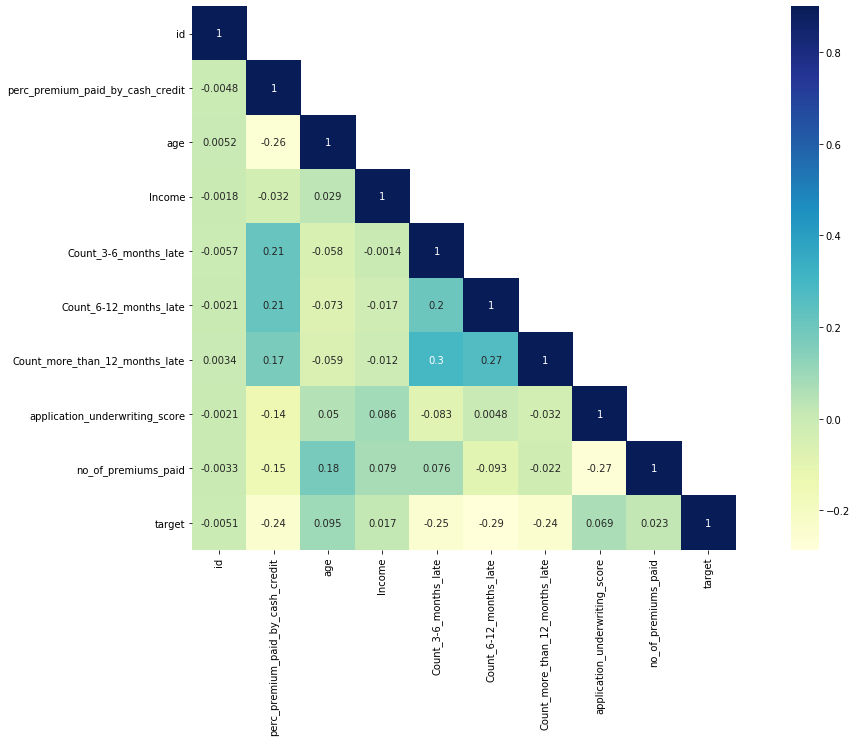

In [218]:
# looking at the correlation between numerical variables
corr = train[['id','perc_premium_paid_by_cash_credit', 'age', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'target']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr,mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

Here, No meaningful correlation between features can be found

## Univariate Analysis

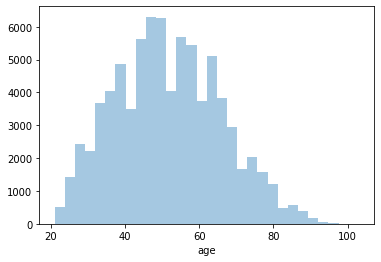

In [219]:
sns.distplot(train['age'],bins=30,kde=False)

Age distribution is somewhat normal

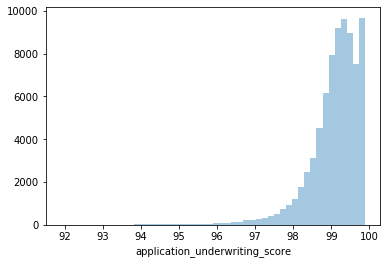

In [220]:
sns.distplot(train['application_underwriting_score'],kde=False)

Skewed to the right side and requires transformation

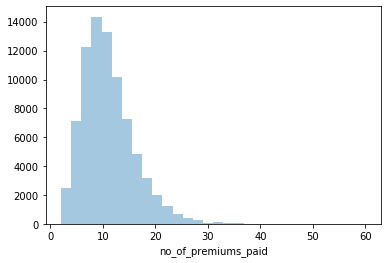

In [221]:
sns.distplot(train['no_of_premiums_paid'],bins=30,kde=False)

Skewed to the left side and requires transformation

## Bivariate Analysis

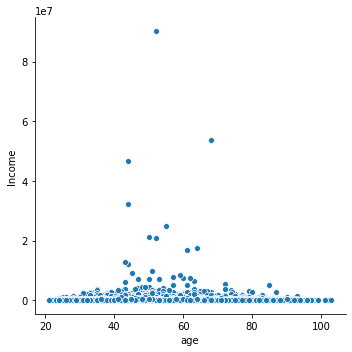

In [222]:
sns.relplot(y='Income',x='age',data=train)

Depicts presence of outliers in Income

target               0      1
sourcing_channel             
A                 2349  40785
B                 1066  15446
C                  903  11136
D                  634   6925
E                   46    563


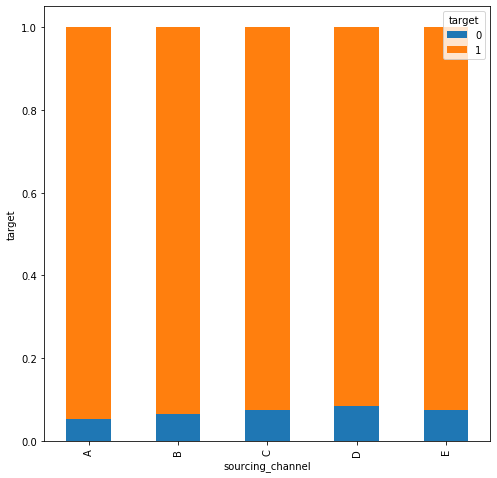

In [223]:
print(pd.crosstab(train['sourcing_channel'],train["target"]))
Dependents = pd.crosstab(train['sourcing_channel'],train["target"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,8))
plt.xlabel("sourcing_channel")
plt.ylabel("target")
plt.show()

target                    0      1
Count_3-6_months_late             
0.0                    2627  64174
1.0                    1153   7673
2.0                     592   1927
3.0                     288    666
4.0                     158    216
5.0                      67    101
6.0                      31     37
7.0                      10     13
8.0                       6      9
9.0                       2      2
10.0                      1      0
11.0                      1      0
12.0                      1      0
13.0                      1      0


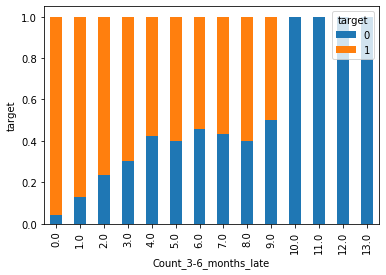

In [224]:
print(pd.crosstab(train['Count_3-6_months_late'],train["target"]))
Dependents = pd.crosstab(train['Count_3-6_months_late'],train["target"])
Dependents.div(Dependents.sum(1),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Count_3-6_months_late")
plt.ylabel("target")
plt.show()

target                     0      1
Count_6-12_months_late             
0.0                     3445  72386
1.0                      828   1852
2.0                      334    359
3.0                      185    132
4.0                       85     45
5.0                       30     16
6.0                       13     13
7.0                        7      4
8.0                        3      2
9.0                        2      2
10.0                       1      3
11.0                       1      1
12.0                       1      0
13.0                       1      1
14.0                       1      1
15.0                       0      1
17.0                       1      0


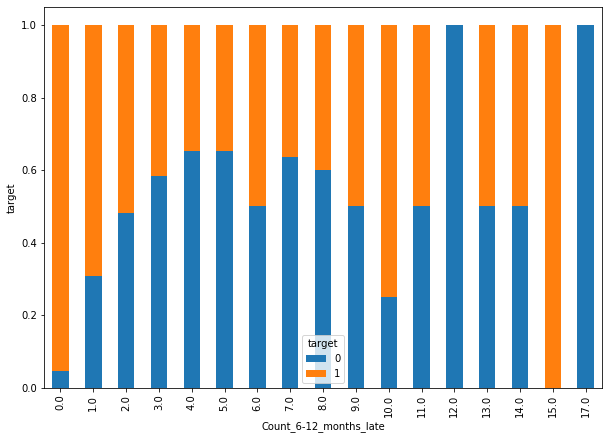

In [225]:
print(pd.crosstab(train['Count_6-12_months_late'],train["target"]))
Dependents = pd.crosstab(train['Count_6-12_months_late'],train["target"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(10,7))
plt.xlabel("Count_6-12_months_late")
plt.ylabel("target")
plt.show()

target                             0      1
Count_more_than_12_months_late             
0.0                             3750  72288
1.0                              835   2161
2.0                              228    270
3.0                               85     66
4.0                               25     23
5.0                                7      6
6.0                                4      2
7.0                                2      1
8.0                                1      1
11.0                               1      0


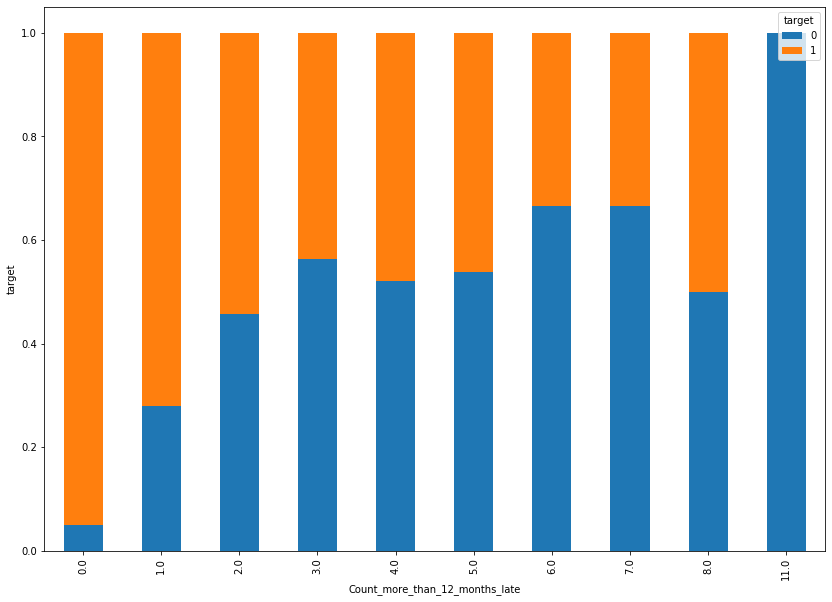

In [226]:
print(pd.crosstab(train['Count_more_than_12_months_late'],train["target"]))
Dependents = pd.crosstab(train['Count_more_than_12_months_late'],train["target"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(14,10))
plt.xlabel("Count_more_than_12_months_late")
plt.ylabel("target")
plt.show()

target                  0      1
residence_area_type             
Rural                1998  29672
Urban                3000  45183


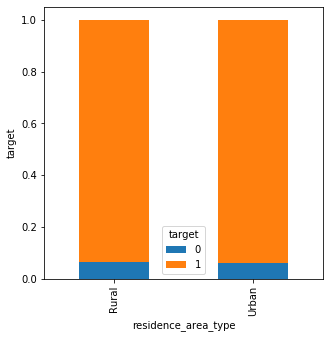

In [227]:
print(pd.crosstab(train['residence_area_type'],train["target"]))
Dependents = pd.crosstab(train['residence_area_type'],train["target"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("residence_area_type")
plt.ylabel("target")
plt.show()

After that we can conclude that sourcing channel type and residence area don't effect target variable at all

# Data Cleaning

In [228]:
target = train.pop('target')
train_id = train.pop('id')
test_id = test.pop('id')

In [229]:
len_train = len(train)

In [230]:
merged = pd.concat([train, test])

In [231]:
merged.drop(['residence_area_type','sourcing_channel'],axis=1,inplace=True)

In [232]:
print('Feature                       # of missing values')
merged.isna().sum()

Feature                       # of missing values


perc_premium_paid_by_cash_credit       0
age                                    0
Income                                 0
Count_3-6_months_late                128
Count_6-12_months_late               128
Count_more_than_12_months_late       128
application_underwriting_score      4297
no_of_premiums_paid                    0
dtype: int64

In [233]:
merged['Count_3-6_months_late'].fillna(merged['Count_3-6_months_late'].mode()[0],inplace=True)
merged['Count_6-12_months_late'].fillna(merged['Count_6-12_months_late'].mode()[0],inplace=True)
merged['Count_more_than_12_months_late'].fillna(merged['Count_more_than_12_months_late'].mode()[0],inplace=True)
merged['application_underwriting_score'].fillna(merged['application_underwriting_score'].mean(),inplace=True)

In [234]:
original_features =['perc_premium_paid_by_cash_credit', 'age', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late','application_underwriting_score',
       'no_of_premiums_paid']

# Data Transformation

In [235]:
# Transforming the features to remove skewness

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged['Income']=np.log(merged['Income'])
merged['no_of_premiums_paid']=np.log(merged['no_of_premiums_paid'])
merged['application_underwriting_score']=np.log(merged[['application_underwriting_score']])

Let's make some more features to increase the strength of model

In [236]:
for col in original_features:
    # Normalize the data, so that it can be used in norm.cdf(), which makes model more powerful
    merged[col] = ((merged[col] - merged[col].mean()) 
    / merged[col].std()).astype('float32')

    # Square
    merged[col+'^2'] = merged[col] * merged[col]

    # Cube
    merged[col+'^3'] = merged[col] * merged[col] * merged[col]

    # 4th power
    merged[col+'^4'] = merged[col] * merged[col] * merged[col] * merged[col]

    # Cumulative normal percentile
    merged[col+'_cnp'] = norm.cdf(merged[col]).astype('float32')


In [237]:
new_features = set(merged.columns) - set(original_features)

In [238]:
for col in new_features:
    merged[col] = ((merged[col] - merged[col].mean()) 
    / merged[col].std()).astype('float32')

In [239]:
merged.head()

,perc_premium_paid_by_cash_credit,age,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,perc_premium_paid_by_cash_credit^2,perc_premium_paid_by_cash_credit^3,...,Count_more_than_12_months_late^4,Count_more_than_12_months_late_cnp,application_underwriting_score^2,application_underwriting_score^3,application_underwriting_score^4,application_underwriting_score_cnp,no_of_premiums_paid^2,no_of_premiums_paid^3,no_of_premiums_paid^4,no_of_premiums_paid_cnp
0,0.342624,-1.299205,1.184663,-0.355901,-0.178501,-0.191295,-0.058533,0.594541,-0.749849,-0.316104,...,-0.018131,-0.223521,-0.239918,0.092872,-0.070642,-0.230656,-0.416810,0.141520,-0.271066,0.753348
1,-0.909406,0.518392,1.003442,-0.355901,-0.178501,-0.191295,1.121581,1.570480,-0.146923,-0.610070,...,-0.018131,-0.223521,0.062114,0.138466,-0.064516,1.381102,0.945668,0.961071,0.221437,1.521414
2,1.800835,-0.250753,-1.003587,2.544524,6.612145,3.030668,-0.508877,-0.665215,1.905790,1.835778,...,-0.002635,4.541094,-0.178398,0.088621,-0.070383,-0.934172,-0.359399,0.028648,-0.265208,-0.906566
3,-0.792868,-0.670287,0.654567,-0.355901,-0.178501,-0.191295,0.688715,-0.153786,-0.315473,-0.515954,...,-0.018131,-0.223521,-0.126546,0.103434,-0.069771,0.910780,-0.629492,0.093690,-0.281348,-0.251251
4,-0.783904,2.406104,0.302266,-0.355901,-0.178501,-0.191295,1.094567,0.431652,-0.327482,-0.509752,...,-0.018131,-0.223521,0.047701,0.135251,-0.065086,1.357139,-0.524596,0.112497,-0.278525,0.552729


In [240]:
train=merged[:len_train]
test=merged[len_train:]
train.shape,test.shape

((79853, 40), (34224, 40))

# Building Model

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score

In [242]:
x1,x2,y1,y2=tts(train,target,test_size=0.2,random_state=50,stratify=target)

In [243]:
models = {}
#model2 = KNeighborsClassifier()
#models.append(model2)
model1 = LogisticRegression(class_weight='balanced',max_iter=1000)
model2 = GaussianNB()
model3 = DecisionTreeClassifier(class_weight='balanced')
model4 = RandomForestClassifier(class_weight='balanced')

models = {'LogReg ':model1,'GaussianNB ':model2,'DTree ':model3,'RandForest ':model4}

In [244]:
for clf in models.keys():
    logi = models[clf].fit(x1,y1)
    pred1=logi.predict_proba(x1)
    pred1 = pred1[:, 1]
    pred2=logi.predict_proba(x2)
    pred2 = pred2[:, 1]
    print(clf,':\n')
    print("Train:",roc_auc_score(y1,pred1))
    print("Validation",roc_auc_score(y2,pred2))
    p=logi.predict(x2)
    print('\nConfusion Matrix : ')
    cm=confusion_matrix(y2,p)
    print(cm)
    print('\n\n\n')

LogReg  :

Train: 0.8397867902289933
Validation 0.8464055173335114

Confusion Matrix : 
[[  730   270]
 [ 2889 12082]]




GaussianNB  :

Train: 0.8245460984449876
Validation 0.832358426290829

Confusion Matrix : 
[[  379   621]
 [  699 14272]]




DTree  :

Train: 1.0
Validation 0.5811509919177076

Confusion Matrix : 
[[  213   787]
 [  759 14212]]




RandForest  :

Train: 1.0
Validation 0.7924664685057778

Confusion Matrix : 
[[  108   892]
 [  103 14868]]






In [245]:
for clf in models.keys():
    avg = 0
    print(clf,':->')
    for kfold in [3,5]:
        v_results = cross_val_score(models[clf],train,target,cv=kfold,scoring='roc_auc', n_jobs = -1)
        print(kfold,'Fold scores : ',v_results)
        avg = avg + v_results.mean()
    print('Avg',avg/2,'\n')

LogReg  :->
3 Fold scores :  [0.83823568 0.83875776 0.84012472]
5 Fold scores :  [0.84428762 0.83418676 0.83933378 0.84543604 0.83488184]
Avg 0.8393322987195333 

GaussianNB  :->
3 Fold scores :  [0.82392503 0.8191174  0.82772643]
5 Fold scores :  [0.828811   0.81825159 0.82236026 0.83050478 0.8219953 ]
Avg 0.8239871019578664 

DTree  :->
3 Fold scores :  [0.57626951 0.5786518  0.56748714]
5 Fold scores :  [0.57598207 0.56894867 0.575484   0.5776205  0.57294901]
Avg 0.5741664999962421 

RandForest  :->
3 Fold scores :  [0.79992992 0.8046762  0.79917883]
5 Fold scores :  [0.80513242 0.80609475 0.80576942 0.80202342 0.78725001]
Avg 0.801257827846368 



In [246]:
p=models['LogReg '].predict(x2)
f1 = f1_score(y2,p)
pr = precision_score(y2,p)
rec = recall_score(y2,p)
print('\nPrecision ',pr,'\nRecall ',rec,'\nF1 score ',f1)


Precision  0.9781411917098446 
Recall  0.807026918709505 
F1 score  0.8843831204479742
